In [2]:
import pandas as pd

In [4]:
df = pd.read_excel(r"mod_NBER-CES Manufacturing Industry Database (sic5811).xls")

In [9]:
device_sic = [3693, 3841, 3842, 3843, 3851]  #From Managing the Medical Arms Race

In [7]:
df.head()

,sic,year,emp,pay,dtfp5,dtfp4
0,2011,1958,200.9,1067.8,NaN,NaN
1,2011,1959,197.2,1101.0,0.033,0.033
2,2011,1960,194.2,1138.6,0.049,0.049
3,2011,1961,189.3,1143.2,-0.016,-0.016
4,2011,1962,185.6,1161.1,0.003,0.003


In [35]:
# Dataframe with device SIC codes
filt = df["sic"].isin(device_sic)
device_df = df.loc[filt]

In [36]:
# Dataframe without device SIC codes
filt = df["sic"].isin(device_sic)
other_df = df.loc[~filt]

In [37]:
# Group the dataframes by year
device_years = device_df.groupby(["year"])
other_years = other_df.groupby(["year"])

In [38]:
device_dtfp5 = {"Medical Device Industry":[], "Other Industries":[]}
for i in range(1959, 2012):
    device_dtfp5["Medical Device Industry"].append(device_years.get_group(i)["dtfp5"].median())
    device_dtfp5["Other Industries"].append(other_years.get_group(i)["dtfp5"].median())

<AxesSubplot:>

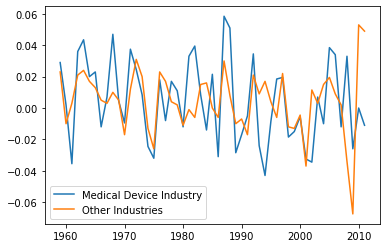

In [41]:
pd.DataFrame.from_dict(device_dtfp5).set_index(pd.Index(list(range(1959, 2012)))).plot(kind='line')

In [6]:
df.sort_values(by="year")

,sic,year,emp,pay,dtfp5,dtfp4
0,2011,1958,200.9,1067.8,NaN,NaN
23706,3861,1958,60.3,369.0,NaN,NaN
7020,2521,1958,5.8,23.5,NaN,NaN
19278,3578,1958,19.8,84.5,NaN,NaN
432,2032,1958,24.2,109.5,NaN,NaN
...,...,...,...,...,...,...
18737,3563,2011,20.0,1251.2,-0.002,-0.002
18683,3562,2011,22.4,1135.4,0.062,0.062
5885,2421,2011,74.7,2904.7,0.020,0.020
5939,2426,2011,17.4,560.5,0.046,0.046
